In [3]:
#load data
import pandas as pd
from pandas import Series, DataFrame


In [10]:
#read data with Pandas from CSV file

NCAA_df = pd.read_csv("data/passing.csv")

In [11]:
#see a few data
NCAA_df.head()

,Player,School,POS,CMP,ATT,CMP%,YDS,AVG,LNG,TD,INT,SACK,RTG
0,Michael Penix Jr.,WASH,['QB'],['182'],['257'],['70.8'],"['2,576']",['10.0'],['57'],['20'],['5'],['4'],['176.8']
1,Jayden Daniels,LSU,['QB'],['163'],['223'],['73.1'],"['2,573']",['11.5'],['86'],['25'],['3'],['17'],['204.3']
2,Brayden Schager,HAW,['QB'],['217'],['342'],['63.5'],"['2,433']",['7.1'],['65'],['20'],['11'],['28'],['136.1']
3,Shedeur Sanders,COLO,['QB'],['219'],['303'],['72.3'],"['2,420']",['8.0'],['75'],['21'],['3'],['34'],['160.3']
4,Austin Reed,WKU,['QB'],['204'],['338'],['60.4'],"['2,280']",['6.7'],['70'],['20'],['5'],['4'],['133.6']


In [6]:
#overall stats about data
NCAA_df.describe()

,Player,School,POS,SOLO,AST,TOT,SACK,YDS,PD,INT,LNG,TD,FF
count,5238,5238,5238,5238,5238,5238,5238,5238,5238,5238,5238,5238,5238
unique,5204,133,22,46,51,81,21,96,12,6,82,3,5
top,Sean Brown,MTSU,['LB'],['1'],['0'],['1'],['0.0'],['0'],['0'],['0'],['0'],['0'],['0']
freq,3,50,1144,1199,1077,1194,3905,3720,3713,4633,4846,5150,4632


In [7]:
#Curiosities?/Briefs?
#How many uniq? (Age, gender, class ....)
#which deck were the passengers on? it is related to class?
#where they are from?
# Are they alone? Who was with the family
#what factor helped  a passenger survive?
#...

In [8]:
#DAV
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


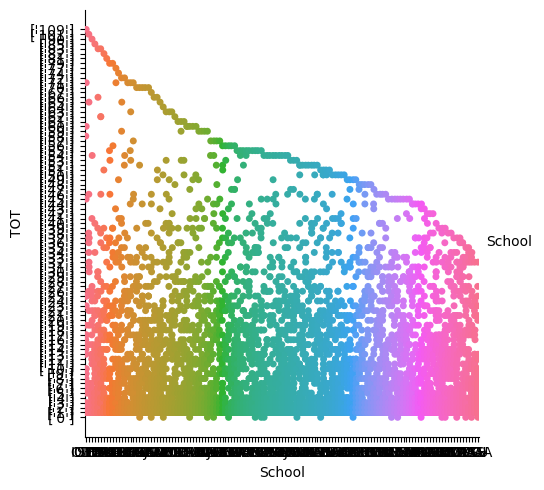

In [9]:
#Pull
sns.catplot(x='School', y='TOT', data=NCAA_df, hue='School')
#sns.countplot(x="SACK", data=NCAA_df)

In [19]:
#Passengers by age
p_age = NCAA_df["TOT"].dropna() #drop nan data
p_age

0       ['109']
1       ['101']
2        ['90']
3        ['85']
4        ['83']
         ...   
5233      ['0']
5234      ['0']
5235      ['0']
5236      ['0']
5237      ['0']
Name: TOT, Length: 5238, dtype: object

(array([  10.,   21.,   29.,   85.,  111.,  225.,  365.,  608.,  945.,
        2839.]),
 array([ 0.,  8., 16., 24., 32., 40., 48., 56., 64., 72., 80.]),
 <BarContainer object of 10 artists>)

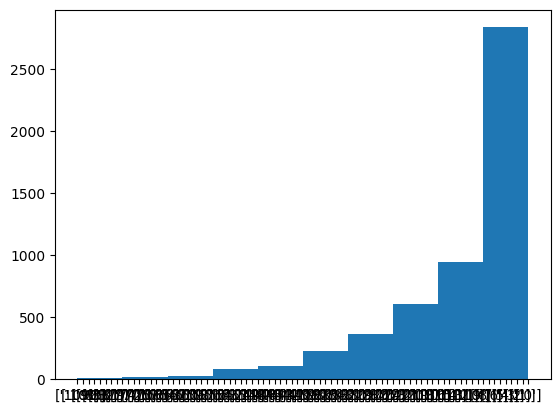

In [20]:
plt.hist(p_age)

/tmp/ipykernel_11437/188081353.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(p_age)


ValueError: could not convert string to float: "['109']"

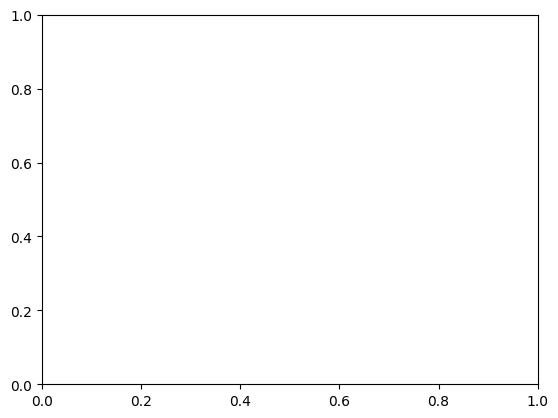

In [21]:
sns.distplot(p_age)

<Axes: xlabel='Pclass', ylabel='Survived'>

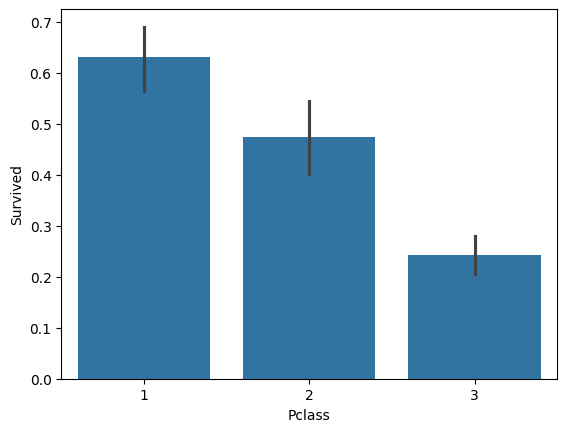

In [81]:
#is class related to survival?
sns.barplot(data=titanic_df, x='Pclass', y='Survived')

<Axes: xlabel='Sex', ylabel='Survived'>

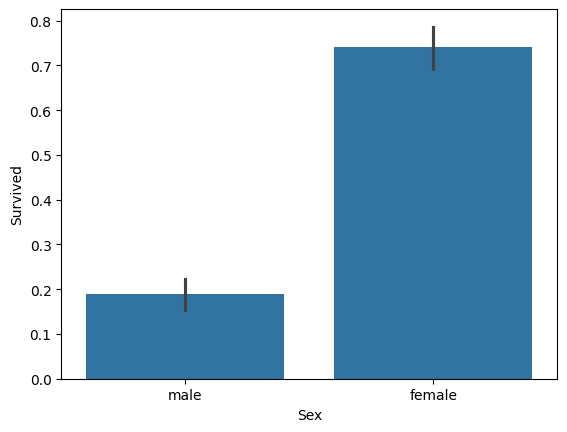

In [82]:
#gender affects survivals?
sns.barplot(data=titanic_df, x='Sex', y='Survived')

<Axes: xlabel='Sex', ylabel='count'>

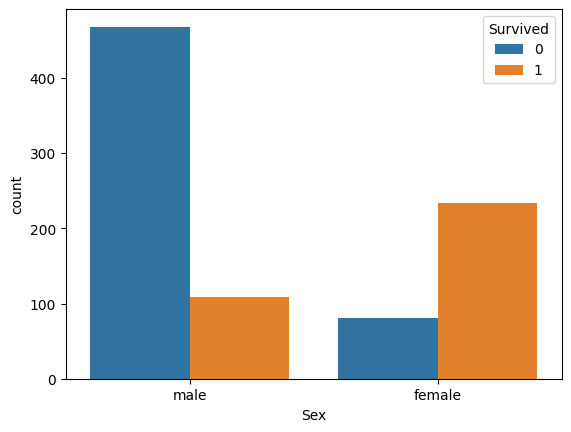

In [83]:
sns.countplot(data=titanic_df, x='Sex', hue='Survived')

/tmp/ipykernel_743/2192897197.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pm_ages["Age"].dropna())


<Axes: xlabel='Age', ylabel='Density'>

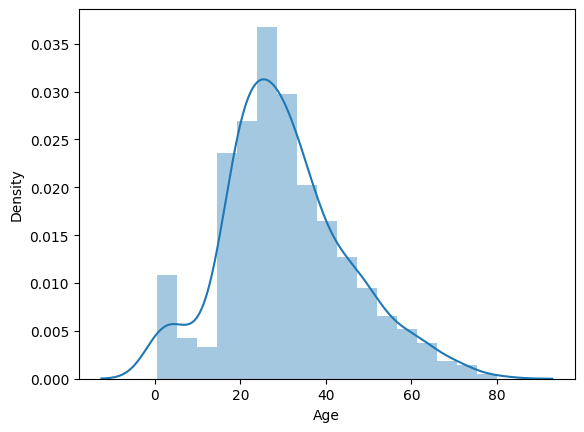

In [84]:
#age distribution
#male
pm_ages = titanic_df[titanic_df['Sex']== 'male']
sns.distplot(pm_ages["Age"].dropna())

/tmp/ipykernel_743/2222896487.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pf_ages["Age"].dropna())


<Axes: xlabel='Age', ylabel='Density'>

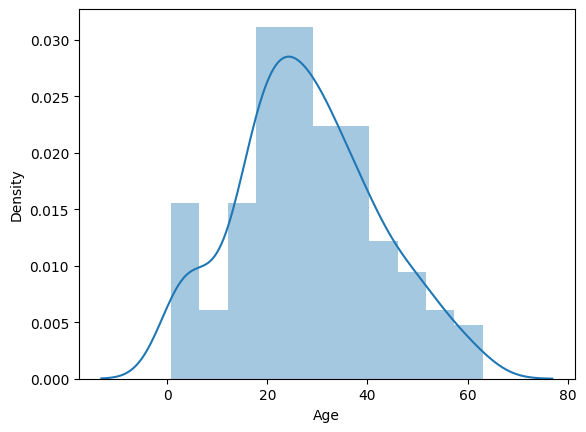

In [85]:
#age distribution
#female
pf_ages = titanic_df[titanic_df['Sex']== 'female']
sns.distplot(pf_ages["Age"].dropna())

/tmp/ipykernel_743/1710763438.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(psf_all["Age"].dropna())


<Axes: xlabel='Age', ylabel='Density'>

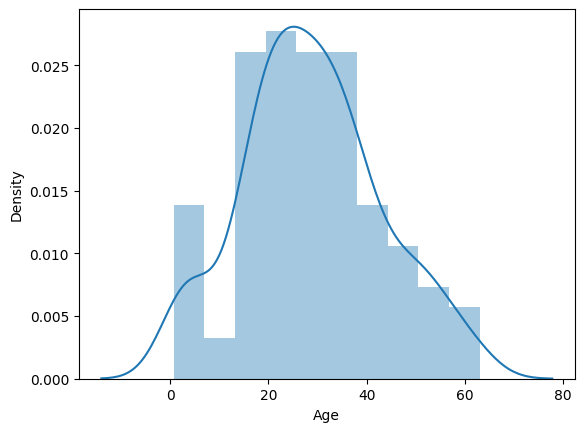

In [86]:
psf_all = titanic_df[(titanic_df['Sex']=='female')& titanic_df['Survived']==1]
sns.distplot(psf_all["Age"].dropna())

/tmp/ipykernel_743/2109708008.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(psm_all["Age"].dropna())


<Axes: xlabel='Age', ylabel='Density'>

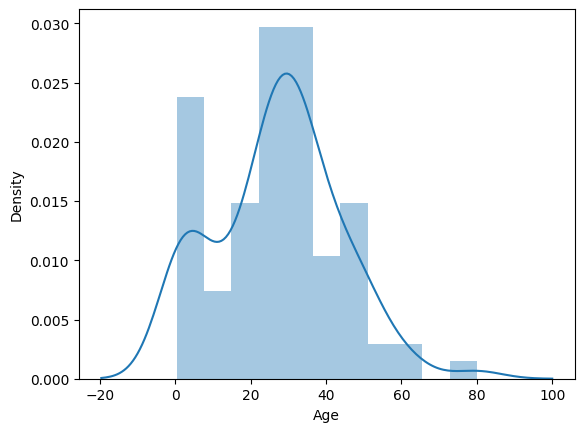

In [87]:
psm_all = titanic_df[(titanic_df['Sex']=='male')& titanic_df['Survived']==1]
sns.distplot(psm_all["Age"].dropna())

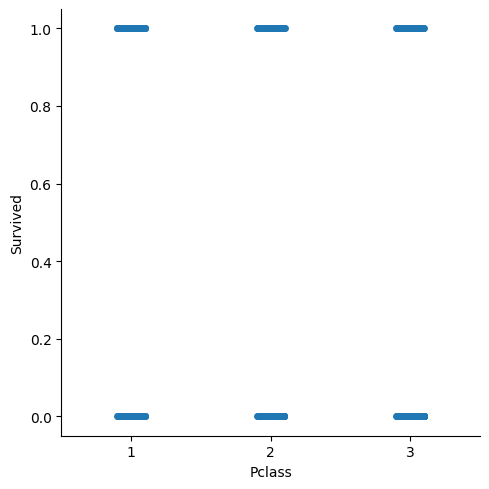

In [93]:
# how class impacts survial?
sns.catplot(x='Pclass', y='Survived', data=titanic_df)

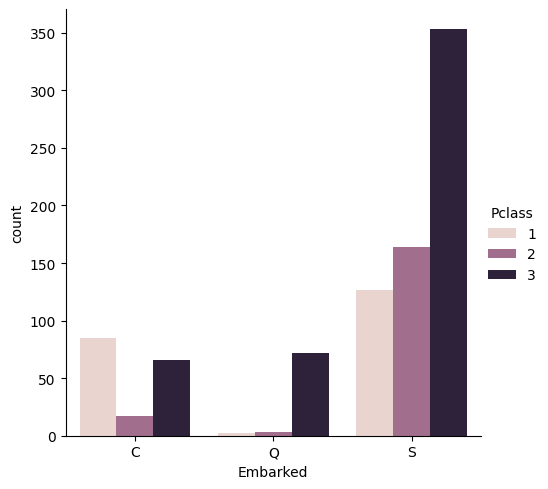

In [95]:
#where passengers are from?
sns.catplot(x='Embarked', data=titanic_df, hue='Pclass', order=['C', 'Q', 'S'], kind='count')

In [96]:
#how about children/adult on survival?
#define child
def male_female_child(passenger):
    age, sex = passenger
    if age < 16:
        return 'child'
    else:
        return sex
    

In [97]:
titanic_df['People'] = titanic_df[['Age', 'Sex']].apply(male_female_child, axis=1)
titanic_df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,People
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


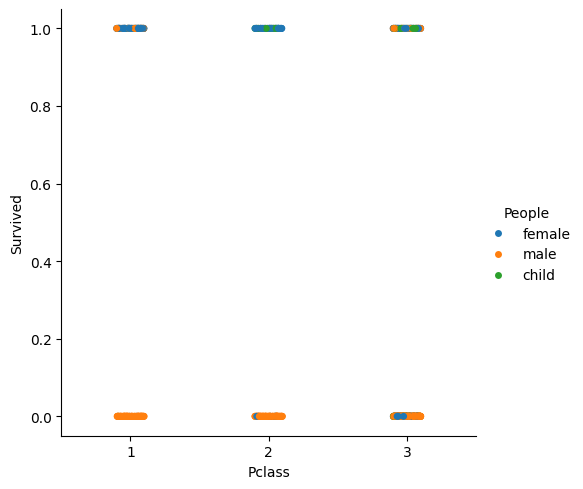

In [100]:
#survival ratio by people, class
sns.catplot(x='Pclass', y='Survived', data=titanic_df, hue='People')

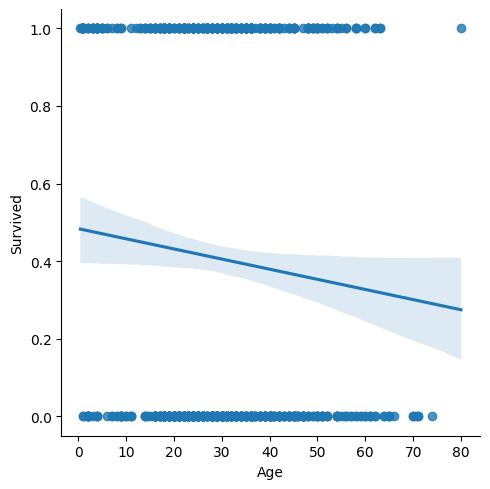

In [102]:
#how about age?
sns.lmplot(x='Age', y='Survived', data=titanic_df)

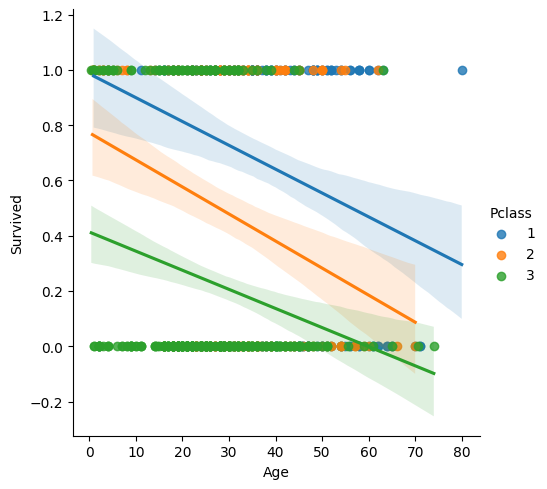

In [103]:
#how about age?
sns.lmplot(x='Age', y='Survived', data=titanic_df, hue='Pclass')

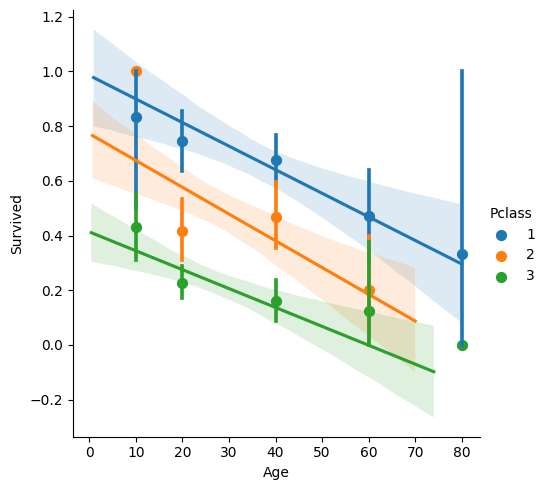

In [104]:
generations = [10, 20, 40, 60, 80] #bins
sns.lmplot(x='Age', y='Survived', data=titanic_df, hue='Pclass', x_bins=generations)

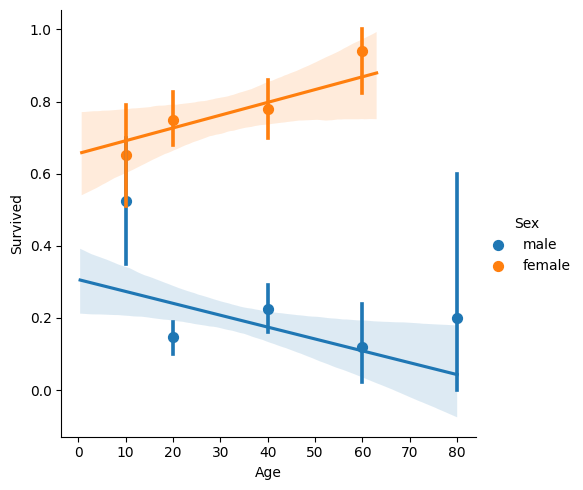

In [106]:
sns.lmplot(x='Age', y='Survived', data=titanic_df, hue='Sex', x_bins=generations)

In [107]:
#ML Data Model
import pandas as pd
import numpy as np
import random as rnd

#machine learning 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

#crossvalidation
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [108]:
#read data from files
train_df = pd.read_csv('data/titanic_train.csv')
test_df = pd.read_csv('data/titanic_test.csv')

combine = [train_df, test_df]

In [109]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [110]:
train_df = train_df.drop(['Name', 'PassengerId', 'Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Name', 'PassengerId', 'Ticket', 'Cabin'], axis=1)
combine=[train_df, test_df]

In [111]:
#ecode sex: female : 0 and male: 1
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map({'female':0, 'male': 1}).astype(int)

In [112]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [113]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)

In [114]:
#encode embarked cat. into int
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map({'S':0, 'C':1, 'Q':2}).astype(int)

In [115]:
#handle missing value of Fare with median
#calculate median
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)

In [116]:
train_df['Fare'].fillna(train_df['Fare'].dropna().median(), inplace=True)

In [117]:
#get train data, and calc 4 quantiles, one quarter each
train_df['Fareband'] = pd.qcut(train_df['Fare'], 4)
train_df[['Fareband', 'Survived']].groupby(['Fareband'], 
 as_index=False).mean().sort_values(by='Fareband', ascending=True)

,Fareband,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [118]:
#encode Fare with 0, 1, 2, and 3 in each Fareband
for dataset in combine:
    dataset.loc[dataset['Fare']<= 7.91, 'Fare']=0
    dataset.loc[(dataset['Fare']> 7.91) & 
                (dataset['Fare'] <= 14.454),'Fare']=1
    dataset.loc[(dataset['Fare']> 14.454) & 
                (dataset['Fare'] <= 31.0), 'Fare']= 2
    dataset.loc[dataset['Fare']> 31.0, 'Fare']= 3
    dataset['Fare'] = dataset['Fare'].astype(int)
    


In [119]:
#clean Fareband col
train_df = train_df.drop(['Fareband'], axis=1)
combine = [train_df, test_df]

In [120]:
#handle missing age data
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [121]:
for dataset in combine:
    for i in range(0,2):
        for j in range(0,3):
            gender = dataset['Sex'] == i
            ppclass = dataset['Pclass'] == (j+1)
            guess_dfna = dataset[gender & ppclass]['Age']
            guess_df = guess_dfna.dropna()
            age_guess = guess_df.median()
            #convert random age float to nearest 0.5 age
            guess_ages[i, j] = (age_guess/0.5 + 0.5)*0.5
    for i in range(0,2):
        for j in range(0,3):
            dataset.loc[(dataset.Age.isnull()) & (dataset.Sex == i) & 
                        (dataset.Pclass == (j+1)), 'Age']=guess_ages[i,j]
    dataset['Age'] = dataset['Age'].astype(int)

In [122]:
#encode age by interval of 16
for dataset in combine:
    dataset.loc[dataset['Age'] <=16, 'Age']=0
    dataset.loc[(dataset['Age']>16) &(dataset['Age']<=32), 'Age']=1 
    dataset.loc[(dataset['Age']>32) &(dataset['Age']<=48), 'Age']=2            
    dataset.loc[(dataset['Age']>48) &(dataset['Age']<=64), 'Age']=3  
    dataset.loc[(dataset['Age'] > 64), 'Age'] = 4


In [123]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,1,1,0,0,0
1,1,1,0,2,1,0,3,1
2,1,3,0,1,0,0,1,0
3,1,1,0,2,1,0,3,0
4,0,3,1,2,0,0,1,0


In [124]:
combine

[     Survived  Pclass  Sex  Age  SibSp  Parch  Fare  Embarked
 0           0       3    1    1      1      0     0         0
 1           1       1    0    2      1      0     3         1
 2           1       3    0    1      0      0     1         0
 3           1       1    0    2      1      0     3         0
 4           0       3    1    2      0      0     1         0
 ..        ...     ...  ...  ...    ...    ...   ...       ...
 886         0       2    1    1      0      0     1         0
 887         1       1    0    1      0      0     2         0
 888         0       3    0    1      1      2     2         0
 889         1       1    1    1      0      0     2         1
 890         0       3    1    1      0      0     0         2
 
 [891 rows x 8 columns],
      Pclass  Sex  Age  SibSp  Parch  Fare  Embarked
 0         3    1    2      0      0     0         2
 1         3    0    2      1      0     0         0
 2         2    1    3      0      0     1         2
 3   

In [125]:
#setup train data, and target output of the model
X_train = train_df.drop('Survived', axis = 1)
Y_train = train_df['Survived']
X_test = test_df.copy()

In [126]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,1,1,0,0,0
1,1,0,2,1,0,3,1
2,3,0,1,0,0,1,0
3,1,0,2,1,0,3,0
4,3,1,2,0,0,1,0


In [127]:
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,2,0,0,0,2
1,3,0,2,1,0,0,0
2,2,1,3,0,0,1,2
3,3,1,1,0,0,1,0
4,3,0,1,1,1,1,0


In [128]:
Y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [129]:
#Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train)*100, 1)
acc_log

80.2

In [130]:
#support Vector Machine
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train)*100, 1)
acc_svc

82.7

In [132]:
#KNN
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train)*100, 1)
acc_knn

85.7

In [133]:
#Random Forest
random_forest = RandomForestClassifier(n_estimators = 100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_train, Y_train)*100, 1)
acc_random_forest

88.6

In [134]:
#Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train)*100, 1)
acc_decision_tree

88.6

In [135]:
#Naive Bayes
guassian = GaussianNB()
guassian.fit(X_train, Y_train)
Y_pred = guassian.predict(X_test)
acc_guassian = round(guassian.score(X_train, Y_train)*100, 1)
acc_guassian

77.1

In [136]:
#Compare all models
models = pd.DataFrame({'Model':['Support Vector Macine', 'KNN',
                                'Logistic Regression', 'Random Forest',
                                'Decision Tree', 'Naive Bayes'], 
                       'Score': [acc_svc, acc_knn, acc_log, acc_random_forest,
                                 acc_decision_tree, acc_guassian]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,88.6
4,Decision Tree,88.6
1,KNN,85.7
0,Support Vector Macine,82.7
2,Logistic Regression,80.2
5,Naive Bayes,77.1


In [137]:
#crossvalidation
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

In [138]:
#Split train data with 50% each
X1, X2, Y1, Y2 = train_test_split(X_train, Y_train, 
                                  random_state = 0, train_size=0.5)

In [139]:
Y2_model = svc.fit(X1, Y1).predict(X2)
Y1_model = svc.fit(X2, Y2).predict(X1)
accuracy_score(Y1, Y1_model)

0.8179775280898877

In [140]:
#Average two models accuracy
acc_svc_avg = ((accuracy_score(Y1, Y1_model)+
                accuracy_score(Y2, Y2_model))/2)
acc_svc_avg

0.8170605129238676

In [141]:
#compute confusion matrix
cnf_matrix = confusion_matrix(Y2, Y2_model)
np.set_printoptions(precision=2)
print(cnf_matrix)

[[251  32]
 [ 50 113]]


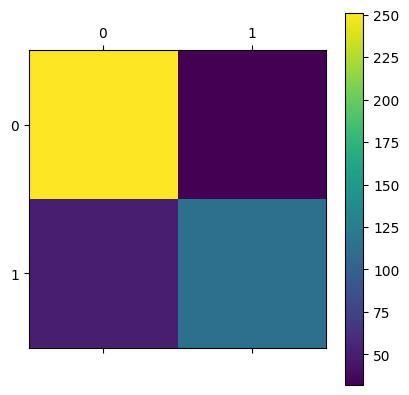

In [142]:
import matplotlib.pyplot as plt
plt.matshow(cnf_matrix)
plt.colorbar()
